# Se han recopilado datos sociodemográficos y de recursos de salud por condado en los Estados Unidos y queremos descubrir si existe alguna relación entre los recursos sanitarios y los datos sociodemográficos.

Para ello, es necesario estableceremos una variable objetivo (relacionada con la salud) para llevar a cabo el análisis.

* Importación de libreria.
* Lectura de archivo.
* Limpieza del mismo.
* Verificaciión de variables.

In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from pickle import dump

In [3]:
data_org= pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

In [4]:
data_org.shape

(3140, 108)

In [5]:
data_org.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [6]:
data_org.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [7]:
data_org.duplicated().sum()

0

In [8]:
print(data_org.dtypes.value_counts())

float64    61
int64      45
object      2
Name: count, dtype: int64


In [9]:
data_org.select_dtypes(include='object').columns

Index(['COUNTY_NAME', 'STATE_NAME'], dtype='object')

In [10]:
df_nm = pd.get_dummies(data_org[['COUNTY_NAME', 'STATE_NAME']], drop_first=True)
df_ap = data_org.select_dtypes(exclude=('object','category'))
carga = [df_ap,df_nm.astype(int)]
data = pd.concat(carga, axis=1)
print(data.dtypes.value_counts())

int64      1935
float64      61
Name: count, dtype: int64


In [11]:
X = data.drop(columns=['diabetes_prevalence','diabetes_Lower 95% CI', 'diabetes_Upper 95% CI'], axis=1)## Las variables 'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI' fueron agregadas del ultimo paso, donde se verifico que el modelo tenia informacion filtrada
y = data['diabetes_prevalence']

# Formamos los conjuntos de entrenamiento y de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

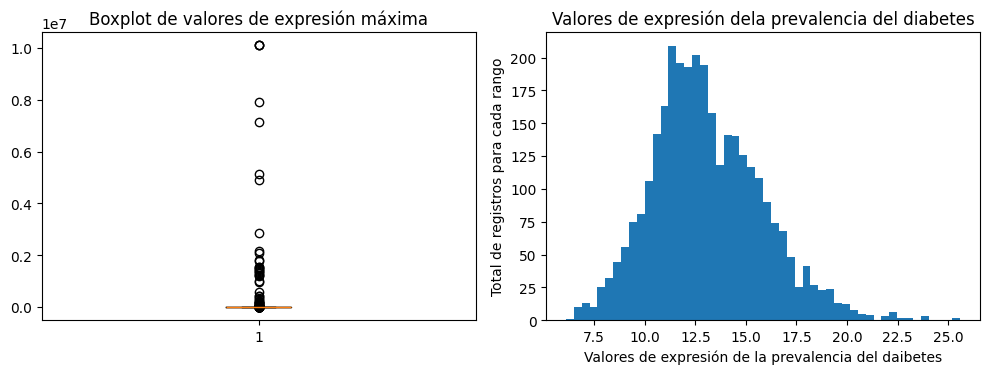

In [12]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(data.max())
plt.title('Boxplot de valores de expresión máxima')
plt.subplot(1, 2, 2)
plt.hist(y,50)
plt.xlabel('Valores de expresión de la prevalencia del daibetes')
plt.ylabel('Total de registros para cada rango')
plt.title('Valores de expresión dela prevalencia del diabetes')
plt.tight_layout()
plt.show()

In [13]:
# Crea una instancia del StandardScaler
scaler = StandardScaler()

# Ajusta el escalador a los datos de entrenamiento y transforma los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transforma los datos de prueba utilizando el mismo escalador
X_test_scaled = scaler.transform(X_test)

In [14]:
# Entrenamos un modelo de regresión lineal sin regularización
m_linear = LinearRegression().fit(X_train_scaled, y_train)

# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
yhat_train_linear = m_linear.predict(X_train_scaled)
yhat_linear = m_linear.predict(X_test_scaled)

In [15]:
# Creamos una función que mida el error en ambos conjuntos y la diferencia
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])

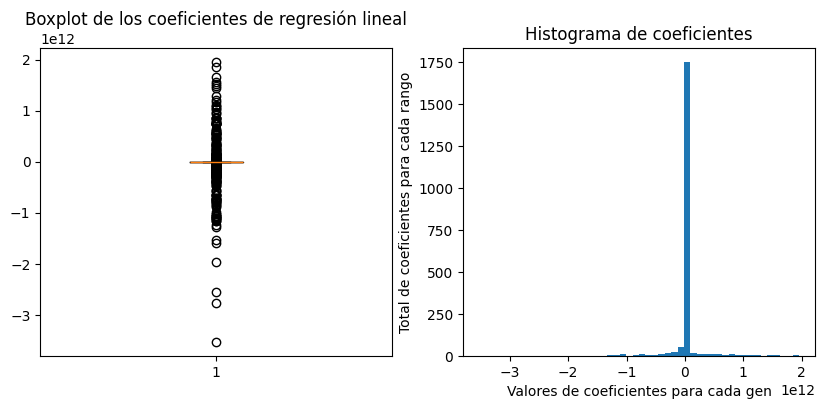

In [16]:
# Graficamos los coeficientes calculados
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_linear.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_linear.coef_,bins= 50)
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

In [17]:
get_metrics(yhat_linear, y_test, yhat_train_linear, y_train)

,R2,Median AE,MAPE
Train set,9.971299e-01,0.033344,7.192866e-01
Test set,-5.155875e+23,0.395935,2.924580e+12
Diferencia,-5.155875e+23,0.362591,2.924580e+12


In [18]:
# Entrenamos un modelo LassoCV debemos encontrar un buen valor de alpha (determina la intensidad de la regularización) mediante validación cruzada
m_lasso = LassoCV(alphas=np.logspace(-6, 6, 10), cv=5, random_state=42, n_jobs=-1).fit(X_train_scaled, y_train)

# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
yhat_train_lasso = m_lasso.predict(X_train_scaled)
yhat_lasso = m_lasso.predict(X_test_scaled)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.547216523579866, tolerance: 1.476035490293678
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0065286795875608, tolerance: 1.4732459084121452
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.41422286111668, tolerance: 1.476035490293678
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coo

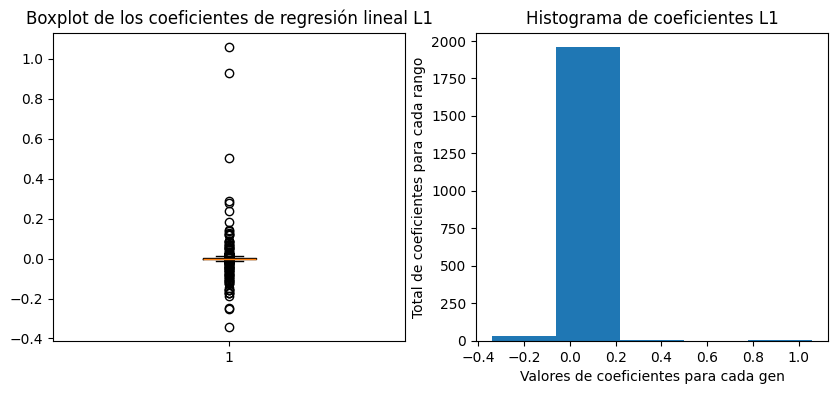

In [19]:
# Graficamos los coeficientes calculados
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_lasso.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal L1')
plt.subplot(1, 2, 2)
plt.hist(m_lasso.coef_,5)
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes L1')
plt.show()

In [20]:
print(f'Mejor alpha encontrado: {m_lasso.alpha_}')
print(f'Coeficientes: {m_lasso.coef_}')

Mejor alpha encontrado: 0.00046415888336127773
Coeficientes: [-0.12834679 -0.         -0.         ...  0.28914954 -0.14928579
 -0.07910579]


In [21]:
# Porcentaje de variables canceladas y variables que usa el modelo
print(f'El porcentaje de variables canceladas es: {round(len(m_lasso.coef_[np.abs(m_lasso.coef_)==0])/len(m_lasso.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_lasso.coef_[np.abs(m_lasso.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 22.08%
El modelo utiliza 1553 variables.


In [22]:
get_metrics(yhat_lasso, y_test, yhat_train_lasso, y_train)

,R2,Median AE,MAPE
Train set,0.996429,0.023518,0.805246
Test set,0.980243,0.198927,2.191875
Diferencia,-0.016186,0.175409,1.386629


In [23]:
ceros = np.nonzero(m_lasso.coef_)[0]
ceros
columnas_ceros = X.columns[ceros]
columnas_ceros

Index(['fips', '0-9 y/o % of total pop', '10-19 y/o % of total pop',
       '30-39 y/o % of total pop', '40-49 y/o % of total pop',
       '50-59 y/o % of total pop', '60-69 y/o % of total pop',
       '70-79 y/o % of total pop', '80+ y/o % of total pop', '% White-alone',
       ...
       'STATE_NAME_Rhode Island', 'STATE_NAME_South Dakota',
       'STATE_NAME_Tennessee', 'STATE_NAME_Texas', 'STATE_NAME_Utah',
       'STATE_NAME_Vermont', 'STATE_NAME_Washington',
       'STATE_NAME_West Virginia', 'STATE_NAME_Wisconsin',
       'STATE_NAME_Wyoming'],
      dtype='object', length=1553)

In [25]:
dump(m_lasso, open("/workspaces/regularizada_linear/models/models.sav", "wb"))

### Podemos observar que el modelo ha sido efectivo en la en ambos conjuntos, teniendo una alta tasa de efectividad .